# Heart Attack Analysis and Prediction

**Nikitia Ramruthan**

### Problem

A heart attack occurs when an artery that sends blood and oxygen to the heart is blocked. Without sufficient oxygen-rich blood, heart muscles become damaged and begin to die. 

The aim of this analysis is the following:
1. To identify the features that are highly correlated with heart attacks using Exploratory Data Analysis.
2. To analyze Machine Learning models that most accurately predict the likelihood of a heart attack in patients.

The models used in this project are as follows:
1. Linear Regression
2. Decision Tree
3. Random Forest
4. K Nearest Neighbours
5. Support Vector Machine

### About this Dataset

- `age`: age of patient
- `sex`: sex of patient
- `cp`: chest pain type
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic
- `trtbps`: resting blood pressure (in mm/Hg)
- `chol`: cholesterol in mg/ dl fetched via BMI sensor
- `fbs`: (fasting blood sugar > 120 mg/dl) (1=true; 0=false)
- `rest_ecg`: resting electrocardiographic results
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- `thalach`: maximum heart rate achieved
- `exng`: exercise induced angina (1=yes; 0=no)
- `slp`: slope
- `caa`: number of major vessels (0-3)
- `output`: (target) 0=less chance of heart attack; 1=more chance of heart attack

### Importing Libraries and Loading Dataset

In [1]:
import opendatasets as od

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")

### Exploratory Data Analysis

In [3]:
print(f'The dataset contains {df.shape[0]} rows, and {df.shape[1]} columns.')
df.head()

The dataset contains 303 rows, and 14 columns.


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Note:
* no null values
* no missing data
* int and float dtypes

In [5]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Note:
* `age`, `trtrbps`, `chol`, `thalachh`, `oldpeak`  columns have a high number of unique values, which might be a concern for outliers

In [6]:
# duplicates
df.loc[df.duplicated(keep=False), :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
# drop duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [8]:
print(f'The dataset now contains {df.shape[0]} rows, and {df.shape[1]} columns.')

The dataset now contains 302 rows, and 14 columns.


In [9]:
df.corr()["output"].sort_values(ascending=False)

output      1.000000
cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

Note:
* Positive correlation with heart attack: `chest pain`, `max heart rate`, `slope`
* Negative correlation with heart attack: `exercise induced angina`, `old peak`, `number of major vessels`, `thall`

<AxesSubplot:>

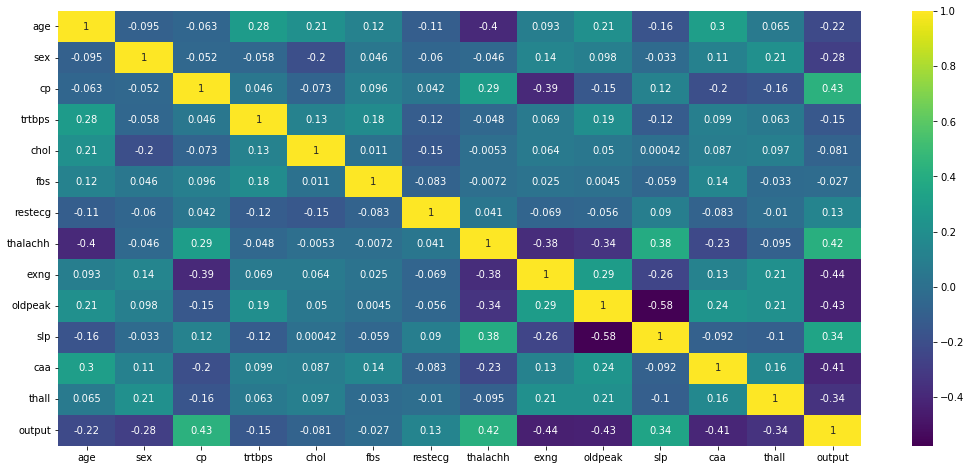

In [10]:
# the correlation between features
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot = True, cmap='viridis')

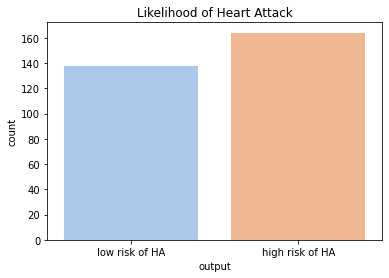

In [11]:
sns.countplot(x='output', data=df, palette='pastel')

plt.xticks(ticks=[0, 1], labels=['low risk of HA', 'high risk of HA'])
plt.title("Likelihood of Heart Attack")
plt.show()

Note:
* the target variable is balanced

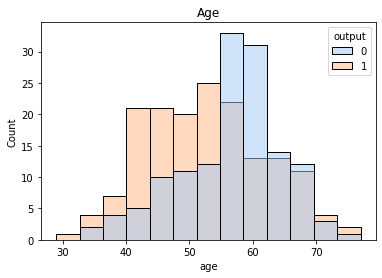

In [12]:
sns.histplot(x='age', data=df, hue='output', palette='pastel')
plt.title("Age")
plt.show()

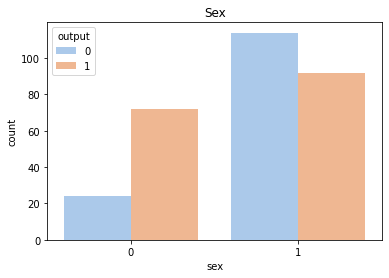

In [13]:
sns.countplot(x='sex', data=df, hue='output', palette='pastel')
plt.title("Sex")
plt.show()

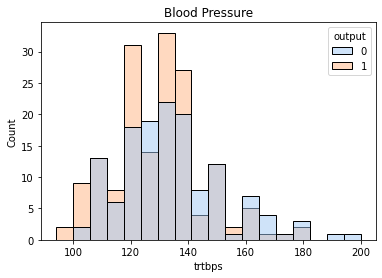

In [14]:
sns.histplot(x='trtbps', data=df, hue='output', palette='pastel')
plt.title("Blood Pressure")
plt.show()

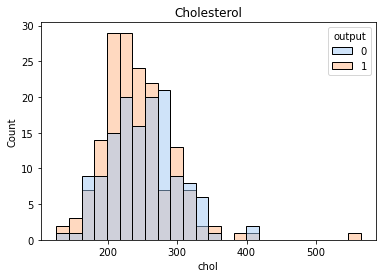

In [15]:
sns.histplot(x='chol', data=df, hue='output', palette='pastel')
plt.title("Cholesterol")
plt.show()

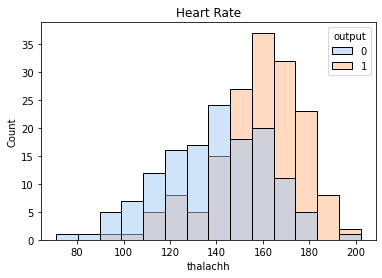

In [16]:
sns.histplot(x='thalachh', data=df, hue='output', palette='pastel')
plt.title("Heart Rate")
plt.show()

Note:
* patients between the ages of 40 and 55 years are more likely to have a heart attack
* patients of sex 0 are more likely to have a heart attack
* patients with blood pressure between 120 and 140 mm/Hg are more likely to have a heart attack
* patients with cholesterol above 200 mg/dL are more likely to have a heart attack
* patients with max heart rate above 150 bpm are more likely to have a heart attack

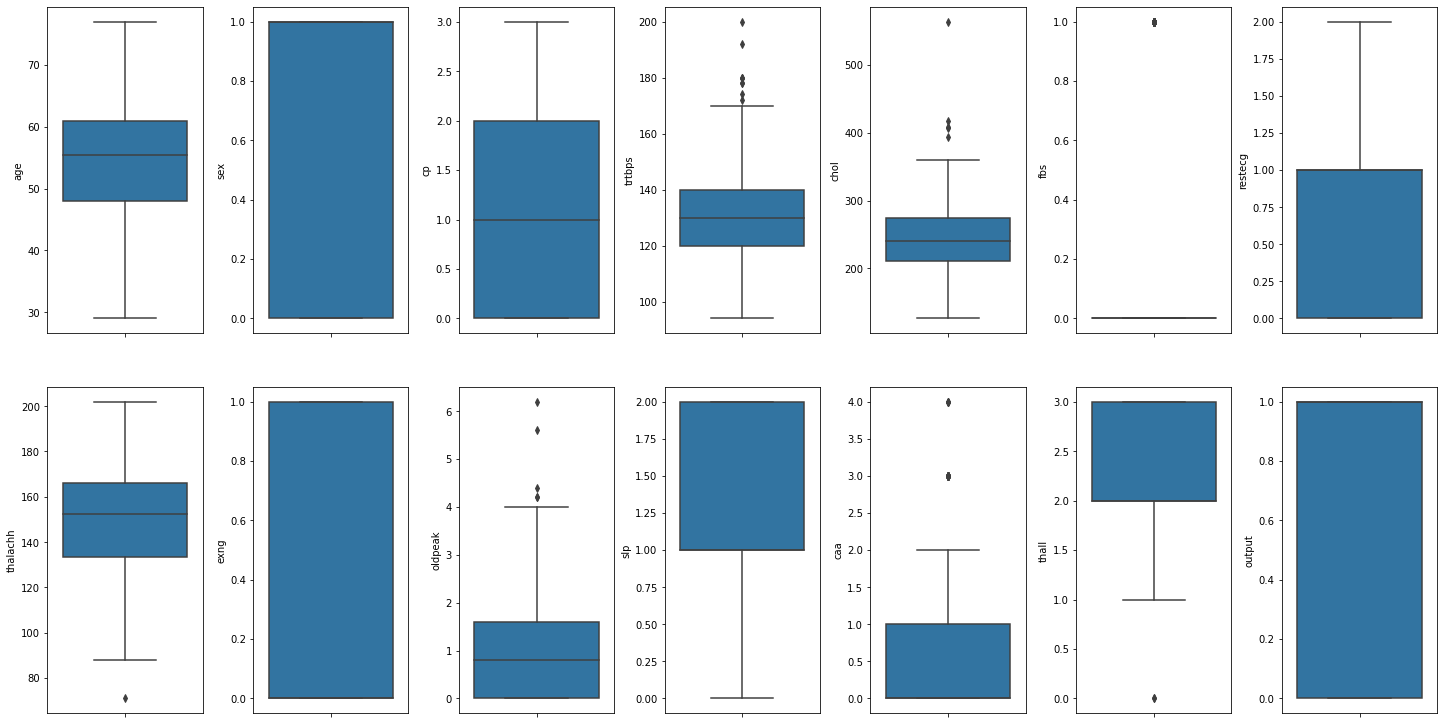

In [17]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

Note: 
* Because of the small size of the dataset the outliers will not be removed.
* Columns with continuous numeric data will be scaled to values between 0 and 1. 

In [18]:
cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/ (maximum - minimum)

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


### Build Models

In [20]:
X = df.drop("output", axis=1)
X.shape

(302, 13)

In [21]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2


In [22]:
y = df['output']
y.shape

(302,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

### Logistic Regression

In [24]:
model_lr = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
lr = accuracy_score(y_test, y_pred_lr)
print(lr)

0.819672131147541


<AxesSubplot:>

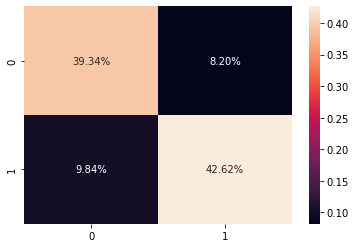

In [25]:
cm1 = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt= '0.2%')

### Decision Tree

In [26]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)
dt = accuracy_score(y_test, y_pred_dt)
print(dt)

0.8032786885245902


<AxesSubplot:>

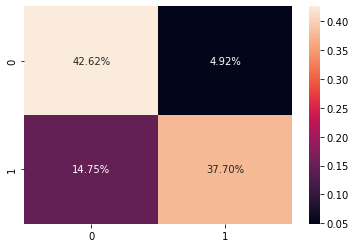

In [27]:
cm2 = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot=True, fmt= '0.2%')

### Random Forest

In [28]:
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
rf = accuracy_score(y_test, y_pred_rf)
print(rf)

0.8688524590163934


<AxesSubplot:>

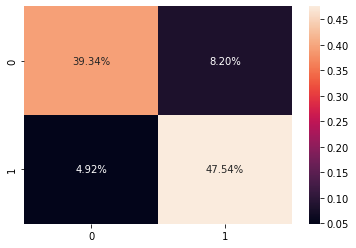

In [29]:
cm3 = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot=True, fmt= '0.2%')

### K-Nearest Neighbours

In [30]:
model_knn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
knn = accuracy_score(y_test, y_pred_knn)
print(knn)

0.9016393442622951


<AxesSubplot:>

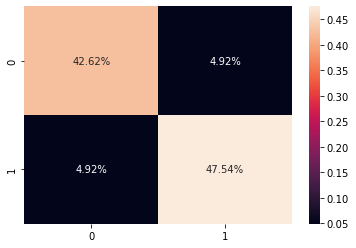

In [31]:
cm4 = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm4/np.sum(cm4), annot=True, fmt= '0.2%')

### Support Vector Machine Model

In [32]:
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
svm = accuracy_score(y_test, y_pred_svm)
print(svm)

0.8688524590163934


<AxesSubplot:>

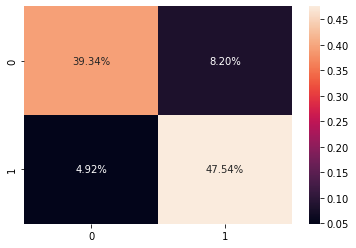

In [33]:
cm5 = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm5/np.sum(cm5), annot=True, fmt= '0.2%')

### Model Accuracy

,Model,Accuracy_score
3,KNeighbours,0.901639
2,Random Forest,0.868852
4,SVM,0.868852
0,Logistic Regression,0.819672
1,Decision Tree,0.803279


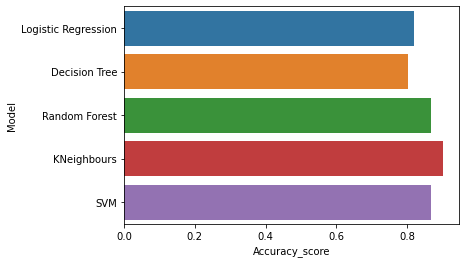

In [34]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'SVM'],
    'Accuracy_score' :[lr, dt, rf, knn, svm]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

### Conclusion

KNN, Random Forest and Support Vector Machine achieved the highest accuracy in predicting the likelyhood of a heart attack in patients.